In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\divyashree\\Desktop\\elevate labs project\\hr_analytics.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,0


In [3]:
df.info()
df.describe()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
 13  job_change              2129 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memo

(2129, 14)

In [5]:
df.isnull().sum()
df = df.dropna()

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,enrollee_id,city_development_index,training_hours,job_change
count,1019.000000,1019.000000,1019.00000,1019.000000
mean,16877.823356,0.839644,64.88420,0.550540
std,10022.496322,0.117586,60.81398,0.497683
min,30.000000,0.487000,1.00000,0.000000
25%,7927.000000,0.767000,23.00000,0.000000
50%,16462.000000,0.910000,47.00000,1.000000
75%,25944.500000,0.920000,86.00000,1.000000
max,33353.000000,0.949000,334.00000,1.000000


In [11]:
for col in df.select_dtypes('object').columns:
    print(col, df[col].unique())
df['gender'] = df['gender'].str.strip().str.title()

city ['city_13' 'city_103' 'city_90' 'city_46' 'city_21' 'city_118' 'city_114'
 'city_16' 'city_61' 'city_136' 'city_160' 'city_104' 'city_28' 'city_105'
 'city_83' 'city_64' 'city_11' 'city_143' 'city_75' 'city_139' 'city_27'
 'city_67' 'city_71' 'city_173' 'city_70' 'city_73' 'city_69' 'city_41'
 'city_74' 'city_176' 'city_167' 'city_89' 'city_98' 'city_149' 'city_76'
 'city_165' 'city_39' 'city_102' 'city_97' 'city_19' 'city_123' 'city_23'
 'city_179' 'city_65' 'city_36' 'city_77' 'city_116' 'city_128' 'city_159'
 'city_80' 'city_72' 'city_50' 'city_162' 'city_99' 'city_138' 'city_115'
 'city_25' 'city_14' 'city_10' 'city_57' 'city_150' 'city_152' 'city_54'
 'city_24' 'city_40' 'city_158' 'city_82' 'city_141' 'city_43' 'city_91'
 'city_45' 'city_133' 'city_93' 'city_121' 'city_101' 'city_12' 'city_42'
 'city_100' 'city_142' 'city_30' 'city_134' 'city_157' 'city_20' 'city_94'
 'city_9' 'city_84' 'city_175' 'city_44']
gender ['Male' 'Female' 'Other']
relevent_experience ['Has relevent

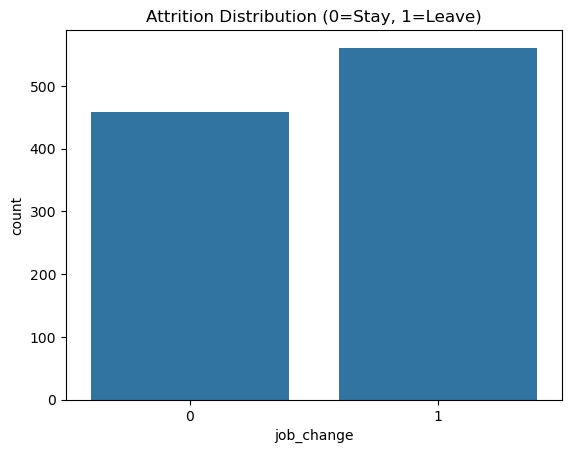

In [13]:
df['job_change'].value_counts()
sns.countplot(data=df, x='job_change')
plt.title('Attrition Distribution (0=Stay, 1=Leave)')
plt.show()

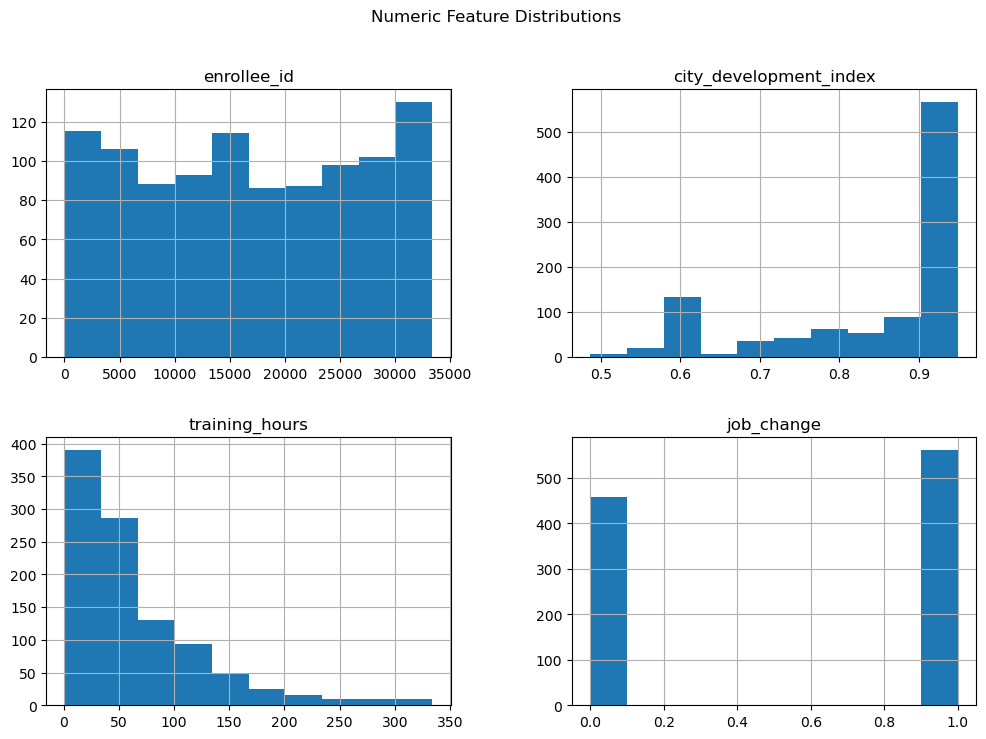

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12,8))
plt.suptitle("Numeric Feature Distributions")
plt.show()

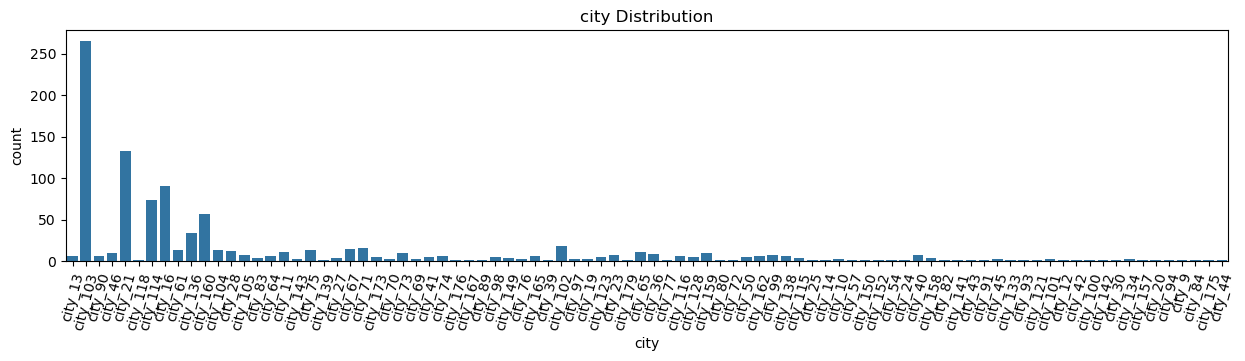

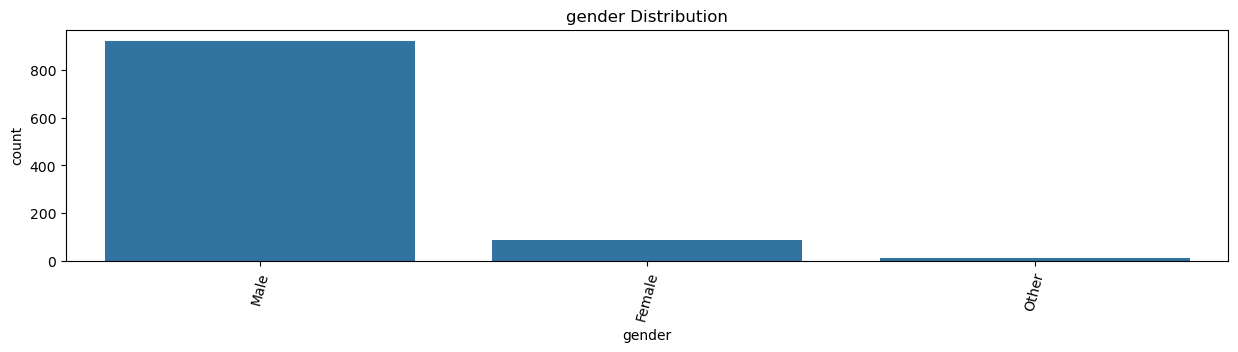

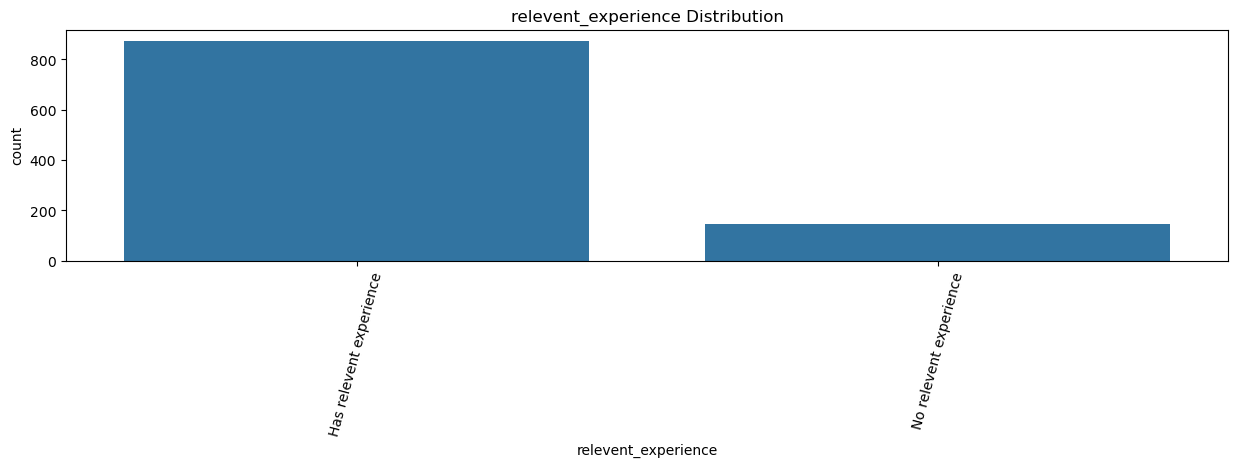

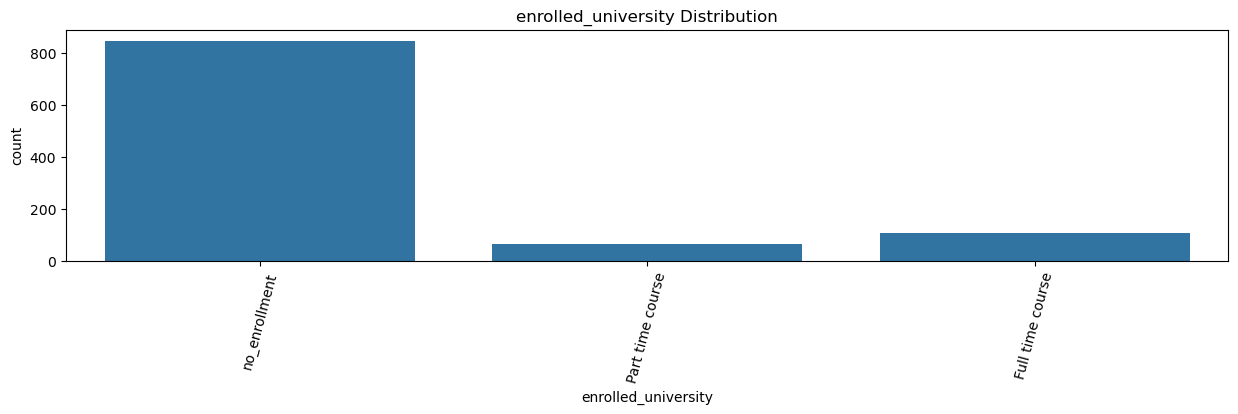

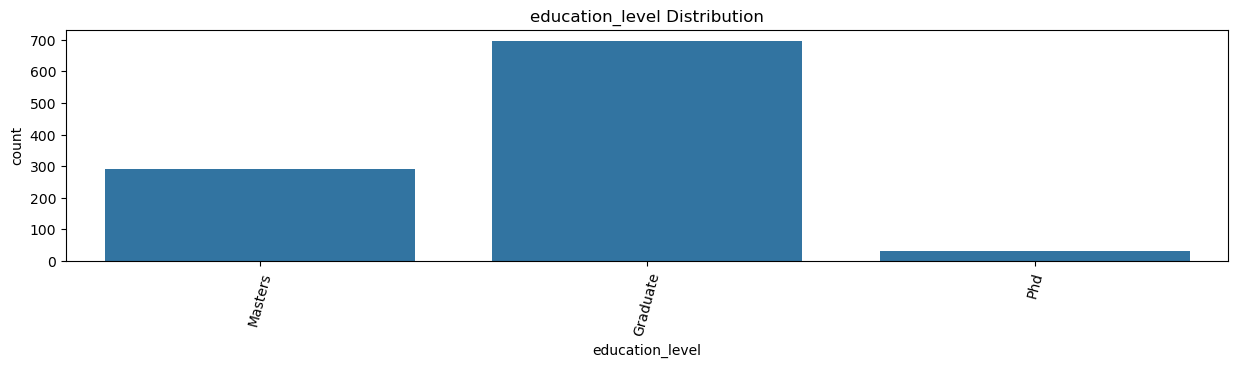

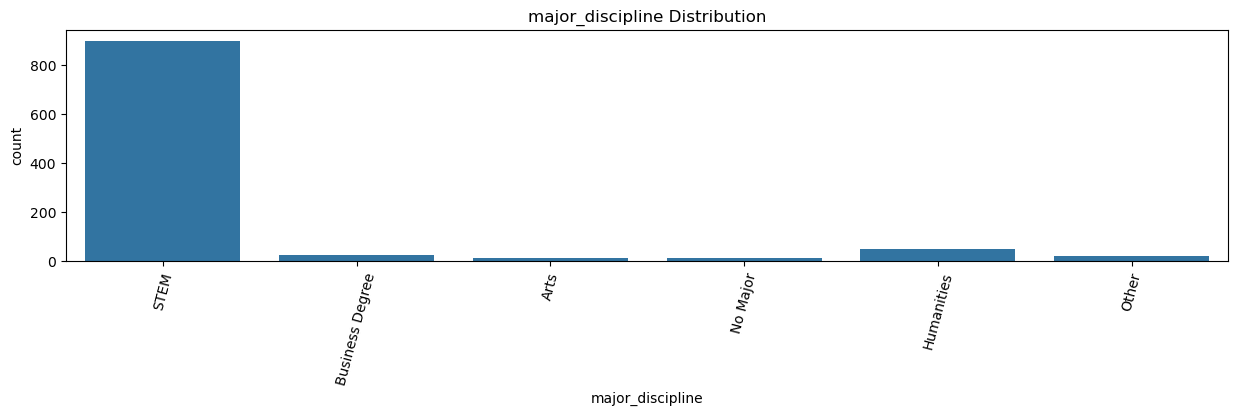

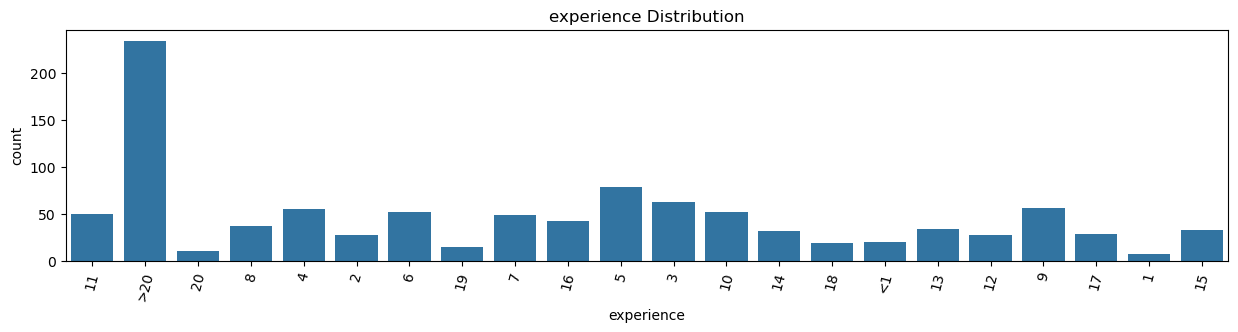

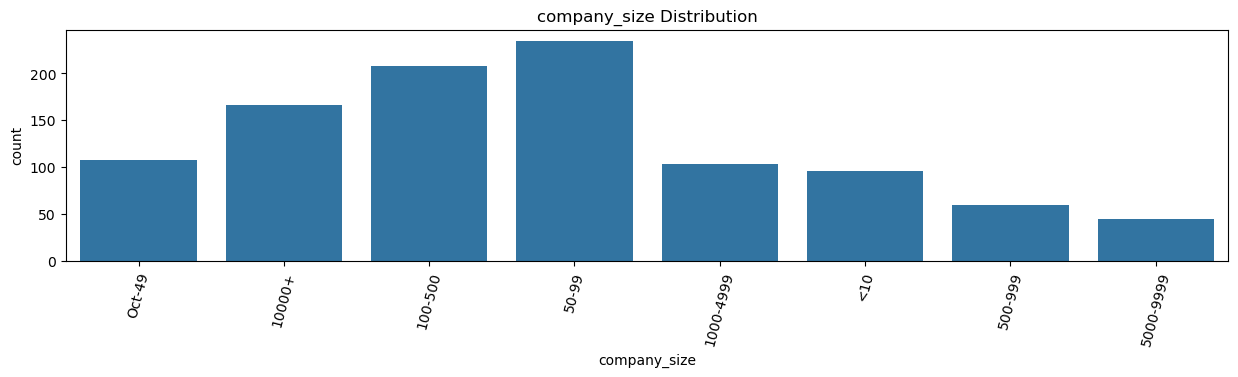

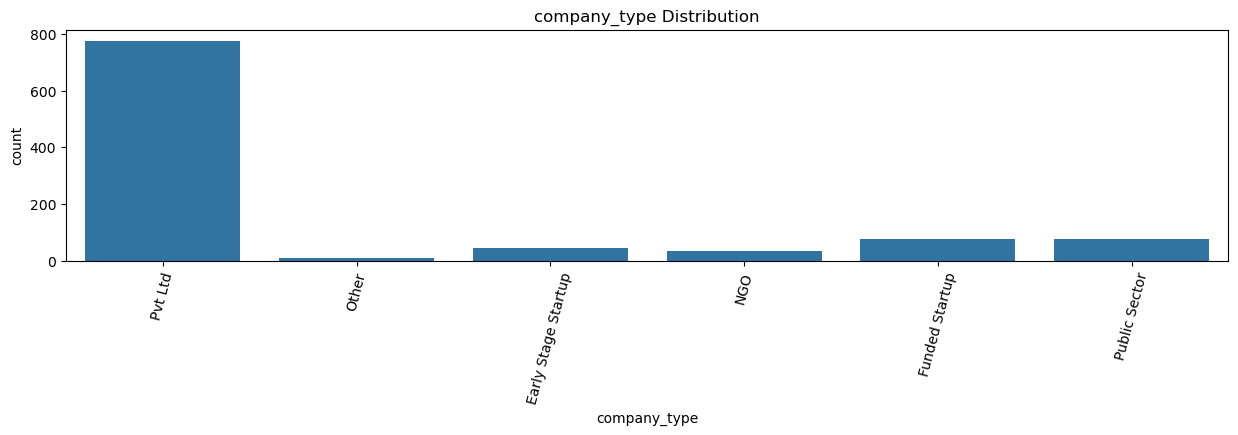

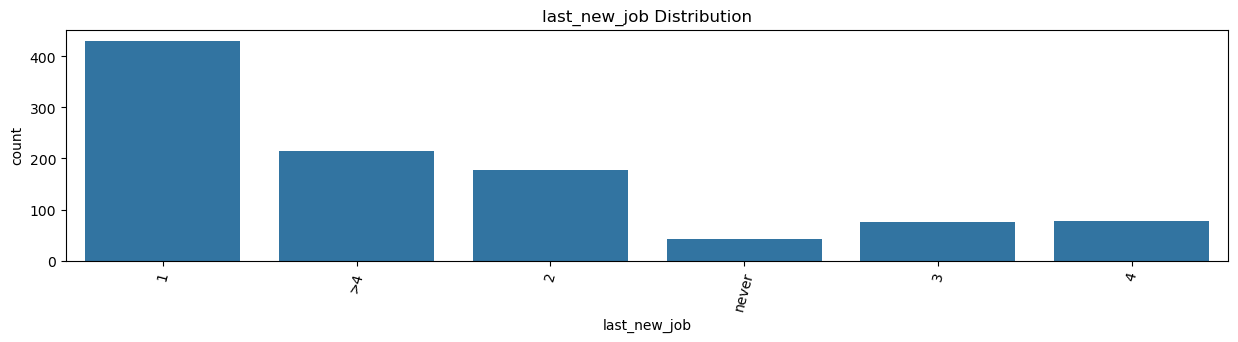

In [17]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(15,3))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=75)
    plt.show()

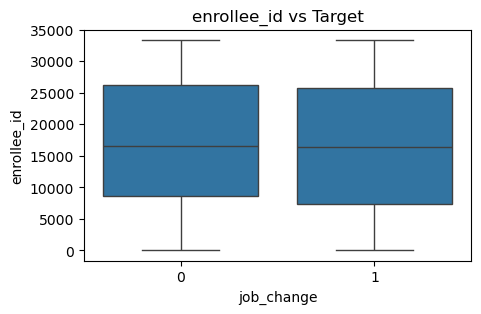

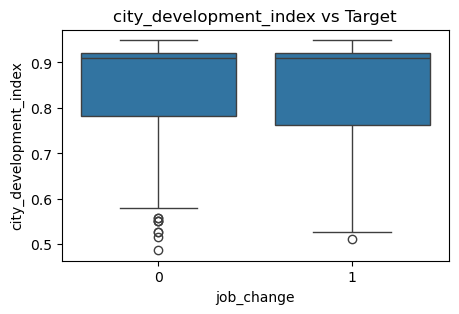

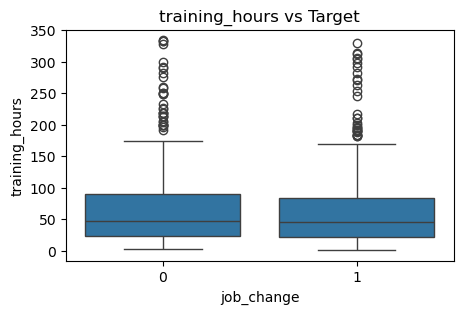

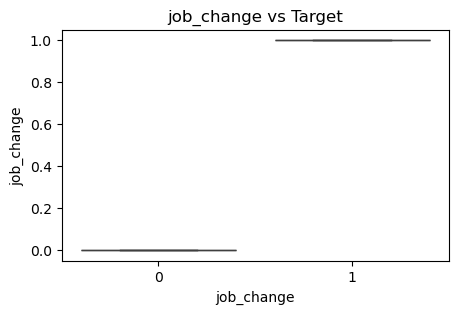

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='job_change', y=col, data=df)
    plt.title(f'{col} vs Target')
    plt.show()

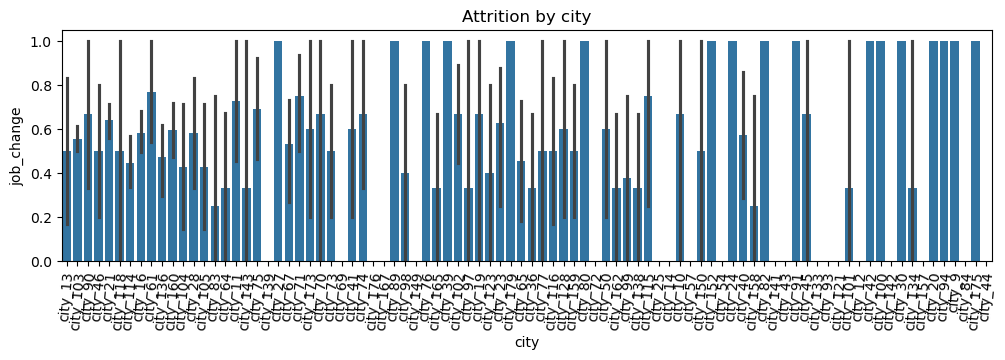

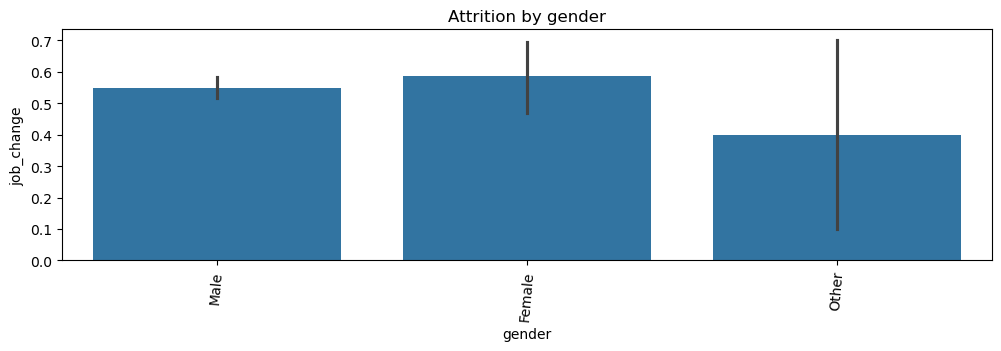

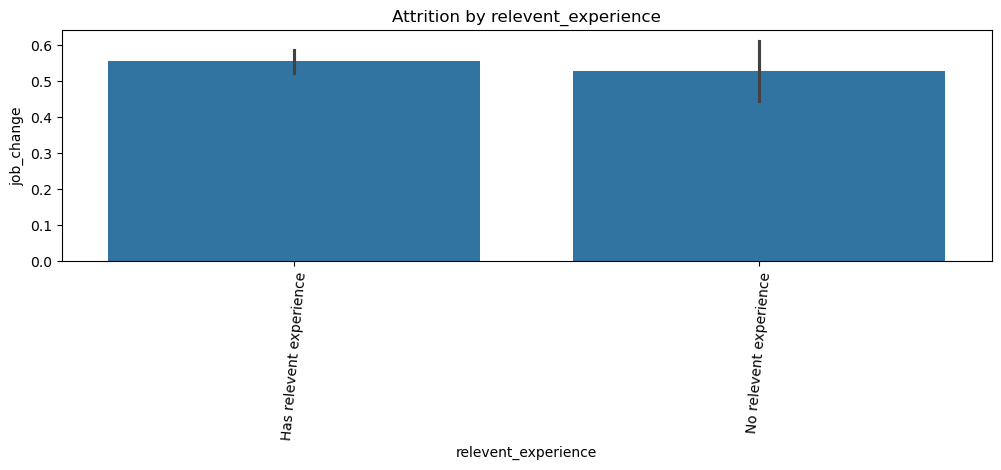

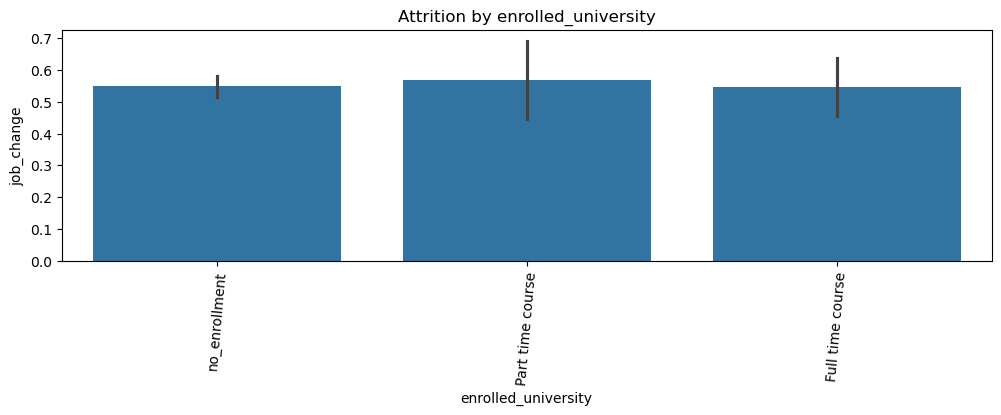

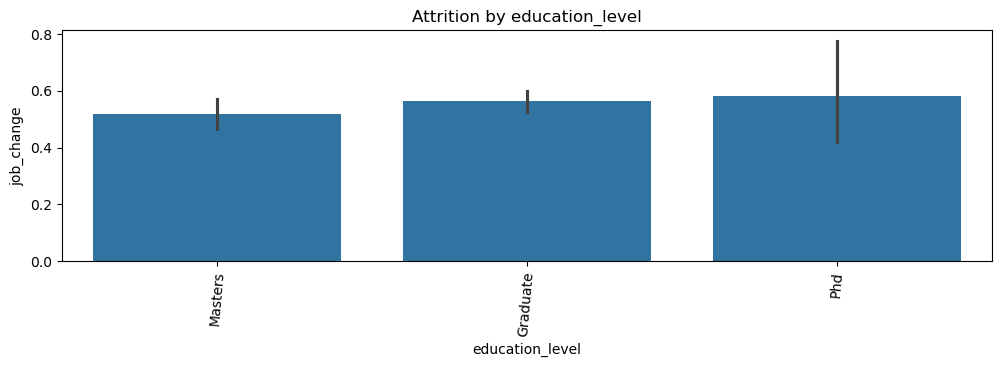

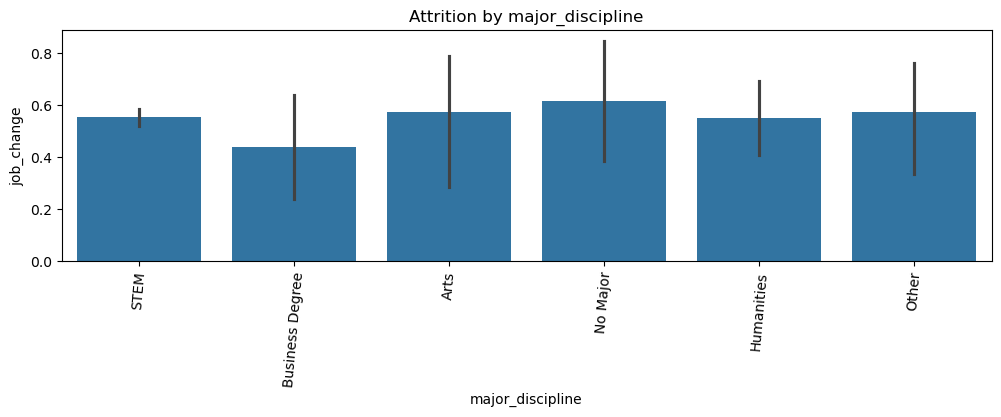

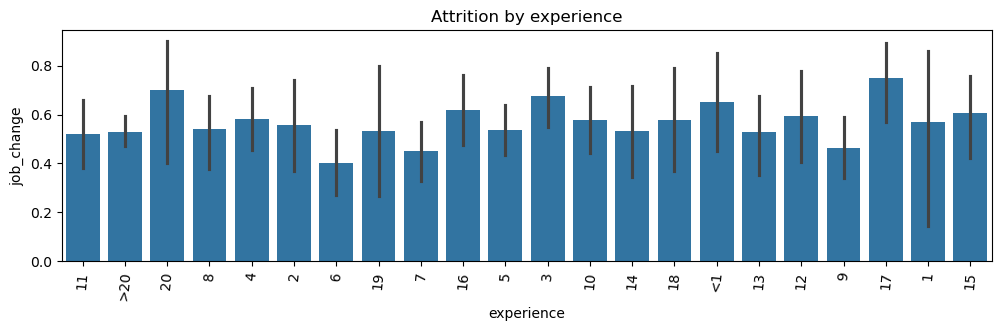

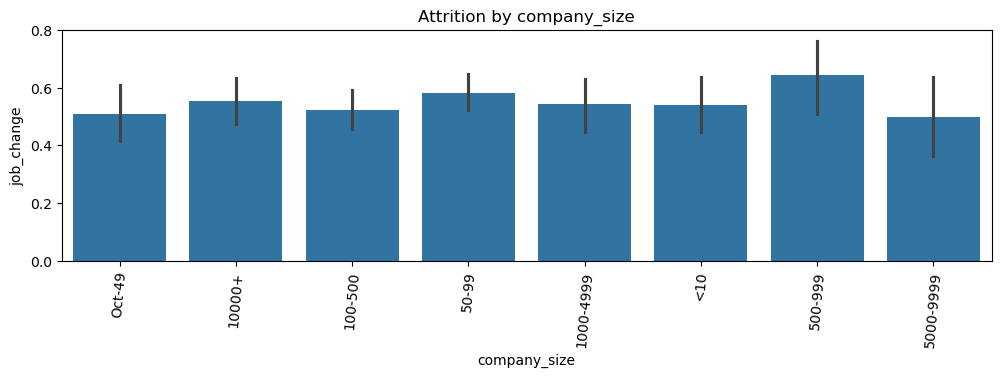

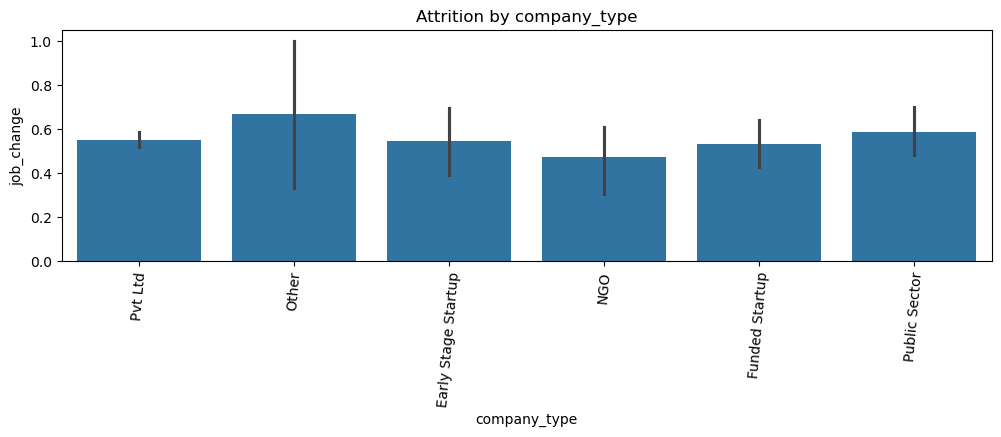

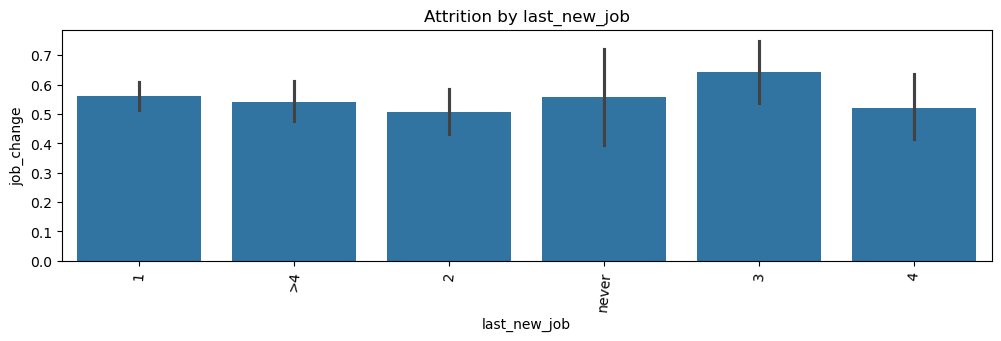

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(12,3))
    sns.barplot(data=df, x=col, y='job_change')
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=85)
    plt.show()

In [23]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['job_change'])
y = df_encoded['job_change']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.49019607843137253
[[41 74]
 [56 84]]
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       115
           1       0.53      0.60      0.56       140

    accuracy                           0.49       255
   macro avg       0.48      0.48      0.48       255
weighted avg       0.48      0.49      0.48       255



In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.5254901960784314
[[  5 110]
 [ 11 129]]
              precision    recall  f1-score   support

           0       0.31      0.04      0.08       115
           1       0.54      0.92      0.68       140

    accuracy                           0.53       255
   macro avg       0.43      0.48      0.38       255
weighted avg       0.44      0.53      0.41       255



<class 'numpy.ndarray'>


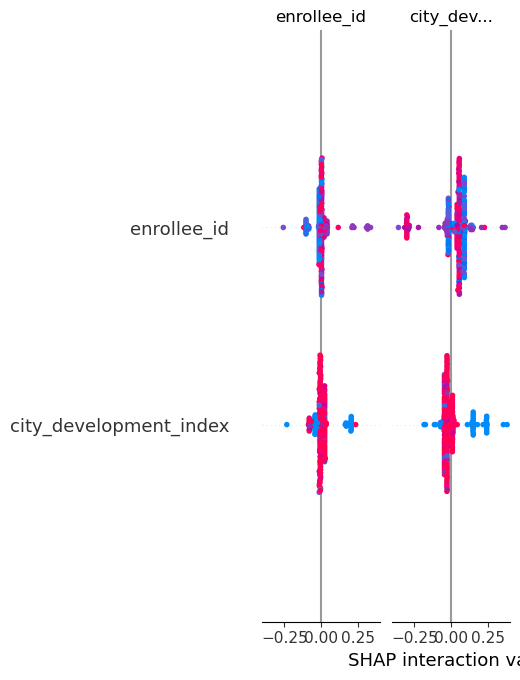

In [35]:
import shap
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=X.columns)
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test_df)
print(type(shap_values))
if isinstance(shap_values, list):
    print("Number of classes in shap_values:", len(shap_values))
    print("Shape of class 0 SHAP values:", shap_values[0].shape)
    print("Shape of class 1 SHAP values:", shap_values[1].shape)

if isinstance(shap_values, list):  # For classification models
    shap.summary_plot(shap_values[1], X_test_df, plot_type="bar")
else:  # For regression models or shap.Explainer unified API
    shap.summary_plot(shap_values, X_test_df, plot_type="bar")


In [37]:
df.to_csv("cleaned_hr_data.csv", index=False, sep=',', encoding='utf-8')